# The Penguin Data Project

###  The Objective

The purpose of this project is to use Logistic Regression, Deep Neural Network, and Support Vector Classifiers  to predict penguin species given other information about the penguins. 

Twin objectives:

1. Accurate: achieve 100% prediction accuray

2. Efficient: use minimum parameters for training the model



### The Data Set

The data set contains details about 377 penguins from 3 species across 13 unique parameters, both qualitative and quantitative.

The 3 species are as listed:

1. Adelie
2. Chinstrap
3. Gentoo 

![title](penguins.png)

## Grabbing the Data

In [1]:
import urllib
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/Shreesh29/Datasets/main/penguins.csv'
filedata = urllib.request.urlopen(url)
with open('penguins.csv', 'wb') as f:
    f.write(filedata.read())
    
penguins = pd.read_csv("penguins.csv")
penguins

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


## Cleaning the data

The next step is to clean our data:

1. Drops all nan values
2. Relabel text values (categorical variables) as numbers
3. Remove columns unnecessary for our analyses 

We will remove the following columns as they do not provide relevant insight about the penguins which could be utilised by our ML models to differentiate between different species:

1. Sample Number
2. studyName
3. Stage
4. IndividualID
5. Clutch Completion 
6. Date Egg
7. Comments

The cleaning process is performed by function clean_data.

In [2]:
def clean_data(df):
    
    """
    This function does the following:
    1. Recodes the island labels to int values.
    2. Recodes the species to int values.
    3. Recodes sex to int values
    4. Drop/Remove columns - Sample Number, studyName, Stage, IndividualID, Clutch Completion, Date Egg, Comments
    5. Drops nan values
    
    It returns:
    A clean copy of our data set. 
    """
    
    # create a copy 
    df_copy = df.copy()
    
    # columns to drop
    drop_cols = ["Sample Number", "studyName", "Stage", "Individual ID", "Clutch Completion", "Date Egg", "Comments", "Region"]
    df_copy = df_copy.drop(columns = drop_cols, axis = 1) # drop the columns
    
    # create labels for recoding species, islands and sex
    island_labels = { "Biscoe": 0,
                      "Dream" : 1,
                      "Torgersen" : 2 }
    
    species_labels = { 'Adelie Penguin (Pygoscelis adeliae)': 0,
                      'Chinstrap penguin (Pygoscelis antarctica)': 1,
                      'Gentoo penguin (Pygoscelis papua)': 2 }
    
    sex_labels = { "MALE": 0,
                   "FEMALE": 1,
                   ".": np.nan }
    
    # recode species and island into int values
    df_copy["Island"] = df_copy["Island"].map(island_labels)
    df_copy["Species"] = df_copy["Species"].map(species_labels)
    df_copy["Sex"] = df_copy["Sex"].map(sex_labels)
    
    # remove all nan values 
    df_copy = df_copy.dropna()
    
    return df_copy

In [3]:
df = clean_data(penguins)
df # clean data frame with numbered characteristics

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
1,0,2,39.5,17.4,186.0,3800.0,1.0,8.94956,-24.69454
2,0,2,40.3,18.0,195.0,3250.0,1.0,8.36821,-25.33302
4,0,2,36.7,19.3,193.0,3450.0,1.0,8.76651,-25.32426
5,0,2,39.3,20.6,190.0,3650.0,0.0,8.66496,-25.29805
6,0,2,38.9,17.8,181.0,3625.0,1.0,9.18718,-25.21799
...,...,...,...,...,...,...,...,...,...
338,2,0,47.2,13.7,214.0,4925.0,1.0,7.99184,-26.20538
340,2,0,46.8,14.3,215.0,4850.0,1.0,8.41151,-26.13832
341,2,0,50.4,15.7,222.0,5750.0,0.0,8.30166,-26.04117
342,2,0,45.2,14.8,212.0,5200.0,1.0,8.24246,-26.11969


# Exploratory Analysis

In [4]:
# making another clean data set for exploratory analysis below 
species_labels2 = { 'Adelie Penguin (Pygoscelis adeliae)': 'Adelie',
                   'Chinstrap penguin (Pygoscelis antarctica)': 'Chinstrap',
                   'Gentoo penguin (Pygoscelis papua)': 'Gentoo' }
    
sex_labels2 = { "MALE": 'M',
               "FEMALE": 'F',
                ".": np.nan }

p_clean = penguins.copy()
p_clean["Species"] = p_clean["Species"].map(species_labels2)
p_clean["Sex"] = p_clean["Sex"].map(sex_labels2)

## 1.  Summary Tables

In [5]:
# function to plot summary tables
def penguin_summary_table(group_cols,value_cols):
    
    """
    This function groups the data according to group_cols, and 
    returns the mean of the values in value_cols.
    
    """
    penguins1 = p_clean.groupby(group_cols)[value_cols].mean()
    
    return penguins1.round(2)

#### A. Culmen Length and Culmen Depth by Species and Sex

In [6]:
penguin_summary_table(["Species","Sex"],["Culmen Length (mm)","Culmen Depth (mm)"])

Culmen Length (mm)  Culmen Depth (mm)
Species   Sex                                       
Adelie    F                 37.26              17.62
          M                 40.39              19.07
Chinstrap F                 46.57              17.59
          M                 51.09              19.25
Gentoo    F                 45.56              14.24
          M                 49.47              15.72

#### Analysis:

1. On average male penguins have longer culmen lengths than female penguins in the same species.
2. On average male penguins have longer culmen depth than female penguins in the same species.

#### B. Flipper Length and Body Mass by Species and Sex

In [7]:
penguin_summary_table(["Species","Sex"],["Flipper Length (mm)", "Body Mass (g)"])

Flipper Length (mm)  Body Mass (g)
Species   Sex                                    
Adelie    F                 187.79        3368.84
          M                 192.41        4043.49
Chinstrap F                 191.74        3527.21
          M                 199.91        3938.97
Gentoo    F                 212.71        4679.74
          M                 221.54        5484.84

#### Analysis:

1. On average male penguins have longer flipper lengths than female penguins in the same species.

2. On average male penguins have  larger body mass than female penguins in the same species.

3. The average flipper lengths of Adelie and Chinstrap penguins are similar. Gentoo penguins have longest flippers across all 3 species on average.

#### C. Delta 15 and Delta 13 by Species and Sex

In [8]:
penguin_summary_table(["Species","Sex"],["Delta 15 N (o/oo)","Delta 13 C (o/oo)"])

Delta 15 N (o/oo)  Delta 13 C (o/oo)
Species   Sex                                      
Adelie    F                 8.79             -25.79
          M                 8.93             -25.83
Chinstrap F                 9.25             -24.57
          M                 9.46             -24.53
Gentoo    F                 8.19             -26.20
          M                 8.30             -26.17

#### Analysis:

1. On average male penguins have a higher concentration of Delta 15 N (o/oo) than female penguins in the same species.
2. On average male penguins have same Delta 13 C (o/oo) as that of female penguins in the same species.


## 2. Charts 


### A. Plotting Culmen Length against Culmen Depth

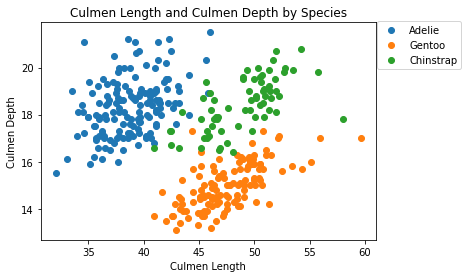

In [9]:
# Plotting Culmen Length against Culmen Depth
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1)

species = list(set(p_clean["Species"]))
counter = 0 

for s in species:
    ax.scatter(p_clean[p_clean["Species"] == str(s)]["Culmen Length (mm)"], 
               p_clean[p_clean["Species"] == str(s)]["Culmen Depth (mm)"],
               label = str(s)) 
    ax.set(xlabel = "Culmen Length", ylabel = "Culmen Depth", 
           title = "Culmen Length and Culmen Depth by Species"
          )
    counter += 1
    
ax.legend(loc='upper right', bbox_to_anchor=(1.27, 1.03), ncol=1)

#### Analysis:

1. There seems to be an positive association between Culmen Length and Culmen Depth within the same species.

2. Given Culmen Length and Culmen Depth, the penguins species are almost distinctively clustered.


### B. Plotting Culmen Length and Culmen Depth Histograms

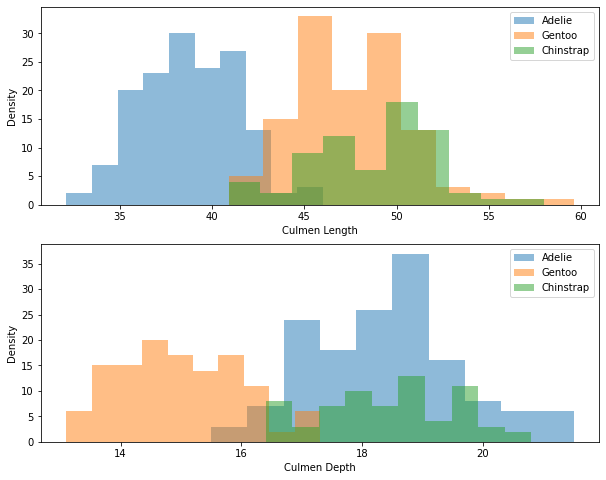

In [10]:
fig, ax = plt.subplots(2, figsize = (10,8))
for s in species:
    
    current = p_clean[p_clean["Culmen Length (mm)"].notnull()] 
    ax[0].hist(current[current["Species"] == str(s)]["Culmen Length (mm)"],alpha = 0.5, label = str(s))
    ax[0].set(ylabel = "Density", xlabel = "Culmen Length")
    
    current = p_clean[p_clean["Culmen Depth (mm)"].notnull()] 
    ax[1].hist(current[current["Species"] == str(s)]["Culmen Depth (mm)"], alpha = 0.5, label = str(s))
    ax[1].set(ylabel = "Density", xlabel = "Culmen Depth")
    
    ax[0].legend()
    ax[1].legend()

#### Analysis:

1. From the figure, Adelie and Gentoo have distinct Culmen Lengths on average. 

2. Given a specific species, the distribution of Culmen Length appears to be a normal distribution. 

3. Chinstrap and Gentoo have similar Culmen Lengths on average.


### C. Population Density across Species and Islands

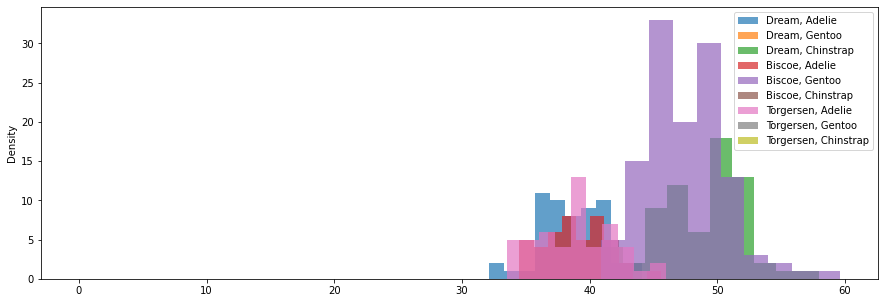

In [11]:
fig, ax = plt.subplots(1, figsize = (15, 5)) 
regions = list(set(penguins["Island"]))
for region in regions:
    current1 = p_clean[p_clean["Island"] == str(region)] 
    for s in species:
        current = current1[current1["Culmen Length (mm)"].notnull()] 
        ax.hist(current[current["Species"] == str(s)]["Culmen Length (mm)"],
               label = str(region)+", "+ str(s.split()[0]),
               alpha = 0.7)
        ax.set(ylabel = "Density") 
                 
ax.legend()

#### Analysis:

1. Each island inhabits at most 2 species. 

    Torgersen island is inhabited by only Adelie penguins.
    
    Biscoe island is inhabited by Gentoo and Adelie penguins.
    
    Dream island is inhabited by Chinstrap and Adelie penguins.
    

2. From the density, the largest group of penguins in the data set is the Gentoo penguins on Biscoe Island. The second largest population in our data set is the Adelie penguins on Biscoe Island.



# Model 1: Linear Regression

![title](LR.png)

### Splitting Data into Training & Test Sets

The data is going to be split into 2 subsets:

1. The training set - this is the subset that our model will train upon.
2. The test set -  this is the subset upon which we will test our model and measure its prediction accuracy.

We are going to hold out 70% of data for training our model and 30% for testing it.

In [12]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

train, test = train_test_split(df, test_size = 0.3) # hold out 30% data for testing

cols = list(df.columns) # list of all our columns 
del cols[0] # delete the Species column

# making our training and testing data sets
X_train = train[cols]
y_train = train[["Species"]]

X_test = test[cols]
y_test = test[["Species"]]

### Feature Selection

To train our model we are going to find the optimal combination of three column variables. If the prediction accuracy for 3-column combinations is not desirable, we can look for 4-column combinations and so on. We will use K-Fold Cross Validation to ascertain average prediction accuracy of different combinations of columns.

Our custom function feature_select is going to perform this task for us and output the 5 best and worst 3-column combinations.

In [13]:
from itertools import combinations
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression 

# feature_select function
def feature_select(model, X_train, y_train, cols):
    
    """
    This function takes a ML model, training data, and predictor columns as input. 
    It outputs the top five and worst five 3-column combinations ranked on the basis of average
    prediction accuracy.
    
    """

    y_train_copy = np.ravel(y_train) # to avoid warning message, need continous arrays
    
    best_score = -np.inf # the best score
    best_combo = [] # the best combination of three of our columns
    all_combos = dict() # this dictionary stores all combinations of columns (key) and their respective CV score (value)
    
    combos = [",".join(map(str, comb)) for comb in combinations(cols, 3)] # making combinations of three columns
    
    # determining the best CV score and column combination
    for i in range(len(combos)):
        
        x_train = X_train[combos[i].split(",")] # training data with the 3 columns 
        score = cross_val_score(model, x_train, y_train_copy, cv = 10).mean() # average prediction score
        all_combos[str(combos[i])] = score
        
        if score > best_score:
            best_score = score
            best_combo.append(combos[i])
            
            
    all_combos = sorted(all_combos.items(), key=lambda x: x[1]) # sort the all_combos based on score
    a = len(all_combos)-1  # for easy indexing of all_combos, see below

    # displaying output of top 5 and worst 5 combos of predictor columns
    print("\nThe top five 3-column combinations and CV scores are: " + "\n")
    for i in range(5):
        print(str(i+1)+ ". " + str(all_combos[a-i][0]) + ": " + str(round(all_combos[a-i][1],3)) + "\n")
        
    print("\nThe worst five 3-column combinations and CV scores are: " + "\n")
    for i in range(5):
        print(str(i+1)+ ". " + str(all_combos[i][0]) + ": " + str(round(all_combos[i][1],3)) + "\n")
    
    print("\nBest Predictors are: " + str(best_combo[len(best_combo)-1]))
    print("\nBest CV Score is: " + str(round(best_score,3)))

In [14]:
# using feature_select

LR = LogisticRegression() # make an instance of the model

feature_select(LR, X_train, y_train, cols)


The top five 3-column combinations and CV scores are: 

1. Culmen Length (mm),Culmen Depth (mm),Delta 13 C (o/oo): 0.996

2. Culmen Length (mm),Culmen Depth (mm),Body Mass (g): 0.987

3. Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm): 0.978

4. Culmen Length (mm),Flipper Length (mm),Delta 15 N (o/oo): 0.978

5. Culmen Length (mm),Culmen Depth (mm),Delta 15 N (o/oo): 0.978


The worst five 3-column combinations and CV scores are: 

1. Island,Body Mass (g),Sex: 0.712

2. Island,Flipper Length (mm),Body Mass (g): 0.739

3. Flipper Length (mm),Body Mass (g),Sex: 0.757

4. Island,Sex,Delta 15 N (o/oo): 0.761

5. Body Mass (g),Sex,Delta 13 C (o/oo): 0.783


Best Predictors are: Culmen Length (mm),Culmen Depth (mm),Delta 13 C (o/oo)

Best CV Score is: 0.996


In [15]:
# setting our training data to our optimal predictor columns
X_train1 = X_train[["Culmen Length (mm)", "Culmen Depth (mm)", "Delta 13 C (o/oo)" ]]
X_test1 = X_test[["Culmen Length (mm)", "Culmen Depth (mm)", "Delta 13 C (o/oo)" ]]

### Determining Optimal Complexity

We will perfrom K-Fold Cross Validation in order to determine the complexity value for our Logistic Regression model. Optimacy is determined according to prediction accuracy.

The idea of K-Fold Cross Validation is to take a small piece of our training data, say 10%, and use that as a mini test set. We train the model on the remaining 90%, and then evaluate on the 10%. We then take a different 10%, train on the remaining 90%, and so on. We do this many times, and finally average the results to get an overall average picture of how the model might be expected to perform on the real test set. 

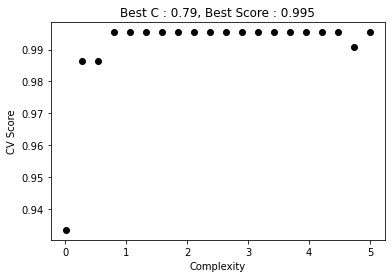

In [16]:
fig,ax = plt.subplots(1)

c_values = np.arange(1,21) # create an array of complexity values 

best_score = -np.inf
best_c = 0

# implementing the k-fold cross validation
for i in np.linspace(0.005,5,20):
    LR = LogisticRegression(C=i)
    cv_score = cross_val_score(LR, X_train1, y_train, cv = 20).mean()
    ax.scatter(i, cv_score, color = "black")
    if cv_score > best_score:
        best_c = i
        best_score = cv_score

l = ax.set(title = "Best C : " + str(round(best_c,2)) + ", Best Score : " + str(round(best_score,3)),
       xlabel = "Complexity", 
       ylabel = "CV Score")

### Evaluating Model on Test Data

In [17]:
LR = LogisticRegression(C = best_score)

LR.fit(X_train1, y_train)

print("The prediction accuracy is: " + str(round(LR.score(X_test1, y_test), 3)))

The prediction accuracy is: 1.0


#### The Logistic Regression model predicts the species of unseen penguins with 100% precision.

# Model 2: Deep Neural Network

![title](DL.jpg)

### Splitting Data into Training & Test Sets

In [258]:
train, test = train_test_split(df, test_size = 0.2) # hold out 20% data for testing

cols = list(df.columns) # list all columns 
del cols[0] # delete the Species column

# making our training and testing data sets
X_train = train[cols]
y_train = train[["Species"]]

X_test = test[cols]
y_test = test[["Species"]]

### Feature Selection

In [259]:
from sklearn.neural_network import MLPClassifier

# make an instance of our model
dnn = MLPClassifier(solver = "lbfgs", alpha = 1e-9, random_state = 0)

# Using feature_select on training data
feature_select(dnn, X_train, y_train, cols)


The top five 3-column combinations and CV scores are: 

1. Culmen Length (mm),Culmen Depth (mm),Delta 13 C (o/oo): 0.984

2. Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm): 0.981

3. Island,Culmen Length (mm),Sex: 0.977

4. Island,Culmen Length (mm),Culmen Depth (mm): 0.977

5. Island,Culmen Length (mm),Delta 15 N (o/oo): 0.973


The worst five 3-column combinations and CV scores are: 

1. Island,Culmen Length (mm),Body Mass (g): 0.429

2. Island,Culmen Depth (mm),Body Mass (g): 0.429

3. Island,Flipper Length (mm),Body Mass (g): 0.429

4. Island,Body Mass (g),Delta 15 N (o/oo): 0.429

5. Island,Body Mass (g),Delta 13 C (o/oo): 0.429


Best Predictors are: Culmen Length (mm),Culmen Depth (mm),Delta 13 C (o/oo)

Best CV Score is: 0.984


#### Result:

The best 3-column combination with highest prediction accuracy is:

Culmen Length, Culmen Depth, and Delta 13 C (o/oo)

A combination of these 3 columns returns an average prediction accuracy of 98.5% on our training data.


In [260]:
# setting training data to optimal predictor columns
X_train1 = X_train[["Culmen Length (mm)","Culmen Depth (mm)", "Delta 13 C (o/oo)" ]]
X_test1 = X_test[["Culmen Length (mm)","Culmen Depth (mm)", "Delta 13 C (o/oo)" ]]

### Determining Optimal Hidden Layers

We will perfrom K-Fold Cross Validation first in order to determine the optimal number of hidden layers for our deep neural network. Optimacy is determined according to prediction accuracy.

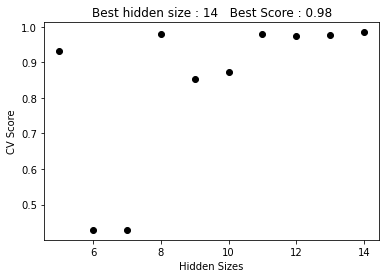

In [261]:
fig, ax = plt.subplots(1)

best_score = 0
best_size = 0

# iterating over different hidden layer sizes 
for d in range(5,15):
     
    nn = MLPClassifier(solver = "lbfgs", alpha = 1e-9, random_state = 0, hidden_layer_sizes = (d,d,d))
    cv_score = cross_val_score(nn, X_train1, y_train, cv = 5).mean()
    
    # draw the plot
    ax.scatter(d, cv_score, color = "black")
    if cv_score > best_score:
        best_size = d
        best_score = cv_score
             
# setting plot title, axis labels
l = ax.set(title = "Best hidden size : " + str(best_size) + "   Best Score : " + str(round(best_score,2)),
    xlabel = "Hidden Sizes", 
    ylabel = "CV Score")


As we can see from the figure above, 

The optimal number of hidden layers is 14 resulting in average prediction accuracy of 99% on unseen data.

Now that we have this value, we can evaluate our model on the test data.

### Evaluating Model on Test Data

In [262]:
dnn = MLPClassifier(solver = "lbfgs", 
                     alpha = 1e-9, 
                     hidden_layer_sizes = (best_size, best_size, best_size), 
                     random_state = 0) 

dnn.fit(X_train1, y_train)

print("The prediction accuracy is: " + str(round(dnn.score(X_test1, y_test), 3)))

The prediction accuracy is: 1.0


The deep neural network predicts penguin species with 100% accuracy.

# Model 3: Support Vector Classifiers

![title](svc.jpg)

### Splitting Data into Training & Test Sets

In [231]:
train, test = train_test_split(df, test_size = 0.2) # hold out 20% data for testing

cols = list(df.columns) # list all columns 
del cols[0] # delete the Species column

# making our training and testing data sets
X_train = train[cols]
y_train = train[["Species"]]

X_test = test[cols]
y_test = test[["Species"]]

### Feature Selection

For this model we will use Island, Culmen Length, and Flipper Length as predictor variables.

These variables have been chosen according to the results in the exploratory analysis.

In [232]:
# setting training data to optimal predictor columns
X_train1 = X_train[["Culmen Length (mm)", "Flipper Length (mm)", "Island" ]]
X_test1 = X_test[["Culmen Length (mm)", "Flipper Length (mm)", "Island" ]]

### Determining Optimal Gamma

We will perfrom K-Fold Cross Validation in order to determine the gamma for our model which gives the highest prediction accuracy on our training set.

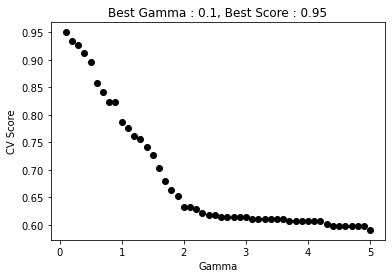

In [233]:
fig, ax = plt.subplots(1)

gamma_values = np.linspace(0.1,5,50) # create an array of gamma values

best_score = -np.inf 
best_gamma = 0

# implementing the k-fold cross validation
for i in gamma_values:
    svc = SVC(gamma = i)
    cv_score = cross_val_score(svc, X_train1, y_train, cv = 5).mean() 
    ax.scatter(i, cv_score, color = "black")
    if cv_score > best_score:
        best_gamma = i 
        best_score = cv_score
    
l = ax.set(title = "Best Gamma : " + str(best_gamma) + ", Best Score : " + str(round(best_score,3)),
    xlabel = "Gamma", ylabel = "CV Score")
 

We can see from the figure above: CV score is decreasing in gamma. This means that our model prediction accuracy tends to be higher when gamma is lower.

In [234]:
from sklearn.svm import SVC

svc = SVC(gamma = best_gamma) 

svc.fit(X_train1, y_train)

print("The prediction accuracy is: " + str(round(svc.score(X_test1, y_test),3)))

The prediction accuracy is: 0.969


## Inspecting & Analyzing Wrong Predictions

### A.  Confusion Matrix

A good way to understand where a classification model is going wrong is via the confusion matrix. The confusion matrix is a simple visualization of the model's predictions against truth.

The i,jth entry of this array gives the number of times that the model predicted species j when the species was in fact i.

In [235]:
y_test_preds = svc.predict(X_test1)
c = confusion_matrix(y_test, y_test_preds)
c

array([[22,  1,  1],
       [ 0, 16,  0],
       [ 0,  0, 25]])

#### Analysis:

Adelie/Chinstrap =  1 mistake i.e. one Adelie was predicted Chinstrap

Adelie/Gentoo =  1 mistake i.e. one Adelie was predicted Gentoo

Gentoo/Chinstrap = 0 mistake

Now, the question arises why is our model confusing both these species with each other? 

### B. Decision Regions

We can use Decision Regions to visualize which parts of the data space our model assigns to each species.

This function will train a model, and then ask it to classify each point on a 2d grid. 

In [242]:
def plot_regions(c, test):
    """
    Plots the decision regions from a classifer 
    underneath the data in X and y. 
    c: a classifier
    X: predictor variables
    y: target variables
    """
    fig,ax = plt.subplots(1,3,figsize = (17,5))
    
    ax[0].set(xlabel = "Culmen Length (mm)", ylabel = 'Flipper Length (mm)')
    
    island_labels = { "0": "Biscoe",
                      "1" : "Dream",
                      "2" : "Torgersen"
                    }
    X = test[['Culmen Length (mm)', 'Flipper Length (mm)']]
    y = test['Species']
    
    # fit the model to the data
    c.fit(X, y)
    
    for i in range(0,3):
        X = test[['Culmen Length (mm)', 'Flipper Length (mm)']][test["Island"] == i]
        y = test['Species'][test["Island"] == i]
    
        # for convenience, give names to the two 
        # columns of the data
        x0 = X['Culmen Length (mm)']
        x1 = X['Flipper Length (mm)']
    
    # create a grid
        grid_x = np.linspace(x0.min(), x0.max(), 501)
        grid_y = np.linspace(x1.min(), x1.max(), 501)
        xx, yy = np.meshgrid(grid_x, grid_y)
    
    # extract model predictions, using the np.c_ attribute 
    #to join together the  two parts of the grid. array.ravel() 
    #converts an multidimensional array into a 1d array, and we use array.reshape()
    #to turn the resulting predictions p back into 2d

        p = c.predict(np.c_[xx.ravel(), yy.ravel()])
        p = p.reshape(xx.shape)
    
    # use contour plot to visualize the predictions
        ax[i].contourf(xx, yy, p, cmap = "jet", alpha = 0.2)
    
    # plot the data
        ax[0].text(35, 165, "Blue: Adelie\nGreen: Chinstrap\nRed: Gentoo")
        ax[i].scatter(x0, x1, c = y, cmap = "jet", vmin = 0, vmax = 2)
        ax[i].set(title = "Island: " + str(island_labels[str(i)]))
        

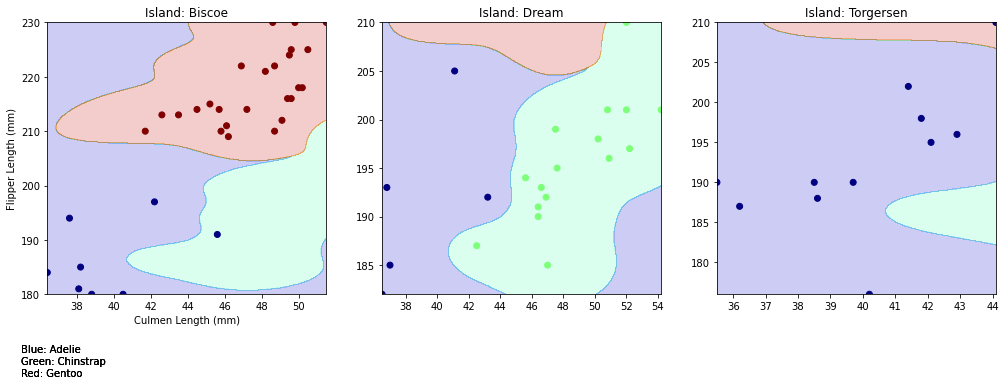

In [243]:
# plotting decision regions
plot_regions(svc, test)

In the above plots showing decision regions: 

Green Area = Chinstrap Penguin

Blue Area = Adelie Penguin

Red Area = Gentoo Penguin

#### Remarks:
1. On Biscoe Island (inhabited by Gentoo and Adelie): one Adelie penguin is confused as Chinstrap.

2. On Dream island (inhabited by Chinstrap and Adelie): No confusions/mistakes

3. On Torgenson island (inhabited only by Adelie): 1 Adelie penguins is confused as Gentoo (see extreme upper left)

This matches with the data of the confusion matrix.

The species of these Adelie penguins have been wrongly predicted by the model because these specific Adelie penguins are outliers in their species with respect to the predictor variables the model used. These decision regions show the same.